## Prevendo Séries Temporais com LSTMs

Dataset Passageiros Aéreos Internacionais (passaporte aéreo).  Os dados contêm o número total de passageiros todos os meses, de janeiro de 1949 a dezembro de 1960. Os números no conjunto de dados referem-se à quantidade em milhares.  Este conjunto de dados foi originalmente usado por Box e Jenkins em seu trabalho em 1976. Ele foi coletado como parte da TimeSeries Dataset Library (TSDL) junto com vários outros conjuntos de dados de séries temporais pelo professor Rob Hyndman na Monash University, Austrália.

O objetivo nosso é prever quanto de passageiros será em um instante futuro de tempo, para isso usaremos o metodo de janela (window) e o tamanho da janela é um parâmetro que pode ser configurado para cada problema.

In [36]:
!git clone https://github.com/FIAPON/fiap-deep-learning.git

Cloning into 'fiap-deep-learning'...
remote: Enumerating objects: 8230, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 8230 (delta 27), reused 27 (delta 10), pack-reused 8163
Receiving objects: 100% (8230/8230), 533.48 MiB | 32.13 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (8235/8235), done.


In [37]:
%cd /content/fiap-deep-learning/RNNS

/content/fiap-deep-learning/RNNS


In [38]:
# Imports
import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Random seed
numpy.random.seed(7)

In [39]:
# Carrega o dataset
dataframe = pandas.read_csv('dataset/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


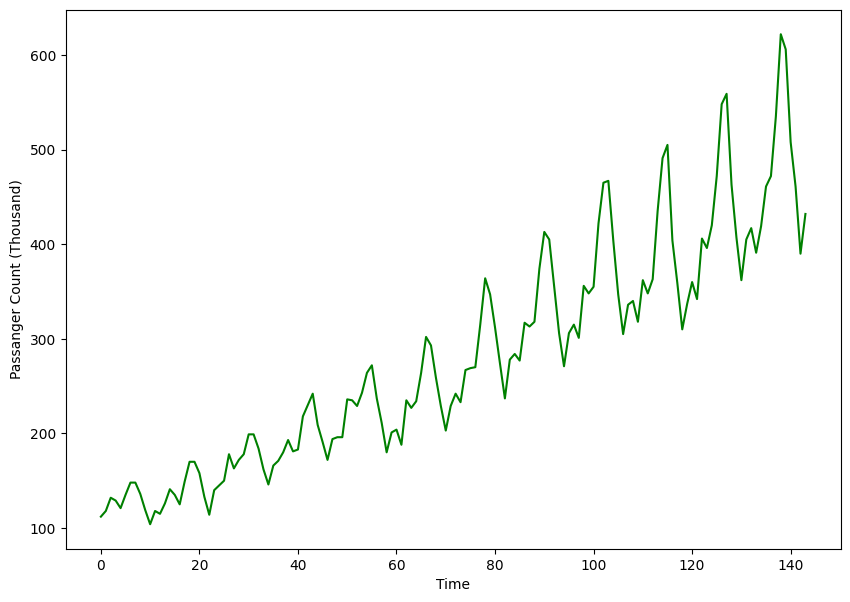

In [20]:
# Plot dos dados
passanger_values = dataframe.iloc[:].values

fig,ax = plt.subplots(figsize=(10,7))
plt.plot(passanger_values,color="green")
plt.xlabel("Time")
plt.ylabel("Passanger Count (Thousand)")
plt.show()

In [21]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [22]:
# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

## Funções para preparação dos dados

### 1. Função `create_dataset`

Esta função é responsável por transformar um array unidimensional em uma matriz, que será utilizada para treinar o modelo LSTM. Ela recebe dois parâmetros:

- `dataset`: O array unidimensional contendo os dados de entrada.
- `look_back`: O número de intervalos anteriores a serem considerados como input para prever o próximo valor.

#### Funcionamento:

- `dataX` e `dataY` são inicializados como listas vazias.
- Um loop é utilizado para iterar sobre o `dataset`, começando do primeiro elemento até o penúltimo elemento menos `look_back`.
- Para cada iteração, `a` recebe uma fatia do `dataset` de tamanho `look_back` a partir do índice `i` e extrai a primeira coluna (`dataset[i:(i+look_back), 0]`), que é adicionada à lista `dataX`.
- O próximo valor no `dataset` após `look_back` é adicionado à lista `dataY`.
- A função retorna `dataX` e `dataY` como arrays numpy.


In [23]:
# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# Split em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [30]:
# Reshape em X=t e Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
# Cria o modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))


model.compile(loss = 'mean_squared_error', optimizer = 'adam')


model.fit(trainX, trainY, epochs = 200, batch_size = 1, verbose = 2)

Epoch 1/200
90/90 - 4s - loss: 0.0114 - 4s/epoch - 44ms/step
Epoch 2/200
90/90 - 0s - loss: 0.0059 - 171ms/epoch - 2ms/step
Epoch 3/200
90/90 - 0s - loss: 0.0054 - 166ms/epoch - 2ms/step
Epoch 4/200
90/90 - 0s - loss: 0.0051 - 170ms/epoch - 2ms/step
Epoch 5/200
90/90 - 0s - loss: 0.0047 - 159ms/epoch - 2ms/step
Epoch 6/200
90/90 - 0s - loss: 0.0045 - 172ms/epoch - 2ms/step
Epoch 7/200
90/90 - 0s - loss: 0.0043 - 155ms/epoch - 2ms/step
Epoch 8/200
90/90 - 0s - loss: 0.0042 - 154ms/epoch - 2ms/step
Epoch 9/200
90/90 - 0s - loss: 0.0042 - 156ms/epoch - 2ms/step
Epoch 10/200
90/90 - 0s - loss: 0.0039 - 161ms/epoch - 2ms/step
Epoch 11/200
90/90 - 0s - loss: 0.0039 - 157ms/epoch - 2ms/step
Epoch 12/200
90/90 - 0s - loss: 0.0039 - 168ms/epoch - 2ms/step
Epoch 13/200
90/90 - 0s - loss: 0.0037 - 164ms/epoch - 2ms/step
Epoch 14/200
90/90 - 0s - loss: 0.0035 - 161ms/epoch - 2ms/step
Epoch 15/200
90/90 - 0s - loss: 0.0035 - 166ms/epoch - 2ms/step
Epoch 16/200
90/90 - 0s - loss: 0.0033 - 180ms/epoc

In [32]:
# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 [==============================] - 0s 6ms/step


In [33]:
# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 20.84 RMSE
Score em Teste: 67.11 RMSE


In [34]:
# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

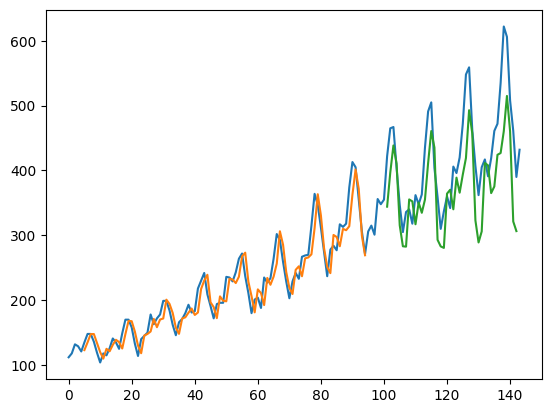

In [35]:
# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()